# **Notebook 3 - Análisis de Series Temporales.**


*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*
*   Recuerda que Google es tu amigo, y saber buscar la información en las documentaciones de las librerías es muy importante.
*   Una solución correcta no es la que funciona sino la que se entiende!
*   No dudes en preguntar cualquier duda al profesor que lleva todo el día dando la turra.

## 1.  Evolución del consumo de potencia eléctrica.


<img src=https://storage.googleapis.com/kaggle-datasets-images/122/260/46fddab9a36e911c711f85624ac0081f/dataset-cover.jpeg width=500px>
<br>


Hoy trabajaremos con Series Temporales. Como hemos visto, el esquema de trabajo será similar al que utilizamos trabajando con texto, lo que en este caso en vez de secuencias de palabras, analizaremos secuencias de la misma variable y su evolución en el tiempo.

El dataset será el ***Individual Household Electric Power Consumption***, que nos muestra la evolución durante 4 años de diferentes variables de consumo eléctrico, a un nivel de granularidad de ***minutos***. Recomiendo leer la información sobre las variables y el dataset en la descripción de su página web.

---

**Documentación del dataset:** http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption


**Tarea:** El trabajo de hoy consistirá en lo siguiente:

1. **Preprocesa las variables y obten el dataset que vamos a analizar, agregado por días**. Con este dataset ahora probaremos a entrenar diferentes tipos de modelos, todos ellos utilizando redes LSTM. Para evaluar los modelos, haz una partición del número de datos del 75/25 entre **train** y **test.** Igualmente, cuando tengas a tu modelo entrenado, realiza una visualización de los resultados reales y los predichos. ¿Cómo ves el ajuste? ¿Estás seguro de que es correcto? Interprétalo para cada caso:

  1.   Entrena un modelo que prediga el valor de la variable *Global_Active_Power* en el tiempo **t** basado en los valores de la variable *Global_Active_Power* en el tiempo **t-1**. 
  2.   Entrena un modelo que prediga el valor de la variable *Global_Active_Power* en el tiempo **t** basado en los valores del resto de variables en el tiempo **t-1**.
 3.   Entrena un modelo que prediga el valor de la variable *Global_Active_Power* para los periodos comprendidos entre **t** y **t+7** (7 días),   basado en los valores de la variable *Global_Active_Power* en el tiempo **t-1**.
  4.   Entrena un modelo que prediga el valor de la variable *Global_Active_Power* para los periodos comprendidos entre **t** y **t+7** (7 días),  basado en los valores del resto de variables en el periodo compredido entre **t-1** y **t-4** (3 días).


In [1]:
!wget -N http://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
!unzip household_power_consumption.zip

--2020-11-19 11:46:57--  http://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20640916 (20M) [application/x-httpd-php]
Saving to: ‘household_power_consumption.zip’

household_power_con 100%[===================>]  19.68M  9.20MB/s    in 2.1s    

2020-11-19 11:47:00 (9.20 MB/s) - ‘household_power_consumption.zip’ saved [20640916/20640916]

Archive:  household_power_consumption.zip
  inflating: household_power_consumption.txt  


In [2]:
import pandas as pd

# Cargamos convenientemente los datos de series temporales.
data = pd.read_csv('/content/household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, 
                 infer_datetime_format=True,
                 index_col='dt',
                 na_values=['nan','?'])

data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


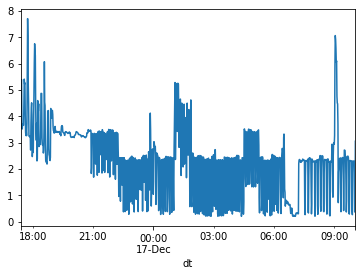

In [3]:
data.Global_active_power.iloc[:1000].plot()

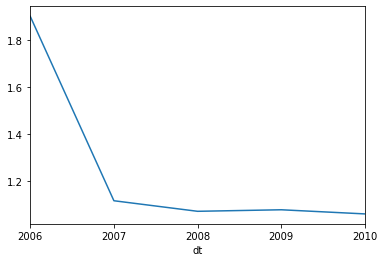

In [4]:
data.Global_active_power.resample('Y').mean().plot()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,12.866667
2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000
2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,0.0,0.066667,0.000000


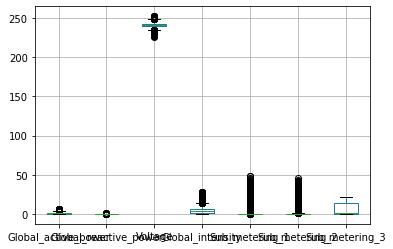

In [5]:
hourly = data.resample('h').mean()
hourly = hourly.fillna(method='bfill')
hourly.boxplot()

from sklearn.preprocessing import MinMaxScaler

display(hourly)

# Escalar las variables con MinMaxScaler.
scaled = MinMaxScaler().fit_transform(hourly)

### **CASO 1** - Input univariable, output univariable. Lag = 1

X: *GlobalAct.Power*{t-1} ----> Y: *GlobalAct.Power*{t}

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

# Sacamaos  los inputs y outputs.
X = scaled[0:-1, 0:1]
Y = scaled[1:  , 0]

# Set de entrenamiento y prueba.
n_train = int(len(X) * 0.7)

X_train, X_test = X[:n_train], X[n_train:]
Y_train, Y_test = Y[:n_train], Y[n_train:]

# Alternativamente esto lo podíamos haber realizado con sklearn. 
# OJO! Marcar el shuffle a False.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, shuffle=False)

# Añadimos la dimensión del timestep requerida por la capa LSTM: [nºseqs, timesteps, nºvars]
X_train, X_test = X_train[:, np.newaxis, :], X_test[:, np.newaxis, :]

print(X_train.shape, X_test.shape)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

# El modelo consiste en una capa LSTM sencilla que generará un vector de tamaño
# 100 que luego será analizado por una capa densa para generar el resultado final.

model = Sequential()
model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=32)
model.summary()

(24211, 1, 1) (10377, 1, 1)


KeyboardInterrupt: ignored

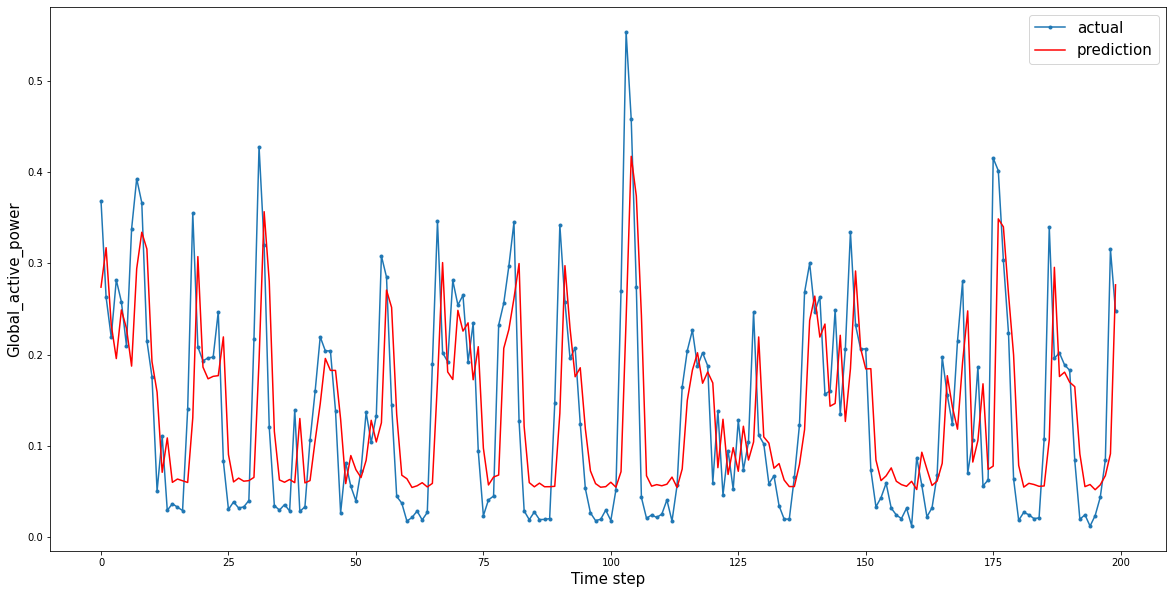

In [ ]:
import matplotlib.pyplot as plt

steps = 200

plt.figure(figsize=(20, 10))
plt.plot(range(steps), Y_test[:steps], marker='.', label="actual")
plt.plot(range(steps), model.predict(X_test[:steps]), 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

### **CASO 2** - Input multivariable, output univariable. Lag = 1

X: *Todas las variables*{t-1} ----> Y: *GlobalAct.Power*{t}

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

# Sacamaos  los inputs y outputs.
X = scaled[0:-1]
Y = scaled[1:  , 0]

# Set de entrenamiento y prueba.
n_train = int(len(X) * 0.7)

X_train, X_test = X[:n_train], X[n_train:]
Y_train, Y_test = Y[:n_train], Y[n_train:]

# Alternativamente esto lo podíamos haber realizado con sklearn. 
# OJO! Marcar el shuffle a False.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, shuffle=False)

# Añadimos la dimensión del timestep requerida por la capa LSTM: [nºseqs, timesteps, nºvars]
X_train, X_test = X_train[:, np.newaxis, :], X_test[:, np.newaxis, :]

print(X_train.shape, X_test.shape)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

# El modelo consiste en una capa LSTM sencilla que generará un vector de tamaño
# 100 que luego será analizado por una capa densa para generar el resultado final.

model = Sequential()
model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=32)
model.summary()

(24211, 1, 7) (10377, 1, 7)
Epoch 1/20
757/757 [==============================] - 2s 3ms/step - loss: 0.0232 - val_loss: 0.0090
Epoch 2/20
757/757 [==============================] - 2s 3ms/step - loss: 0.0103 - val_loss: 0.0084
Epoch 3/20
757/757 [==============================] - 2s 3ms/step - loss: 0.0098 - val_loss: 0.0081
Epoch 4/20
757/757 [==============================] - 2s 3ms/step - loss: 0.0097 - val_loss: 0.0082
Epoch 5/20
757/757 [==============================] - 2s 3ms/step - loss: 0.0096 - val_loss: 0.0081
Epoch 6/20
757/757 [==============================] - 2s 3ms/step - loss: 0.0096 - val_loss: 0.0080
Epoch 7/20
757/757 [==============================] - 2s 3ms/step - loss: 0.0096 - val_loss: 0.0080
Epoch 8/20
757/757 [==============================] - 2s 3ms/step - loss: 0.0095 - val_loss: 0.0080
Epoch 9/20
757/757 [==============================] - 2s 3ms/step - loss: 0.0095 - val_loss: 0.0079
Epoch 10/20
757/757 [==============================] - 2s 3ms/step - los

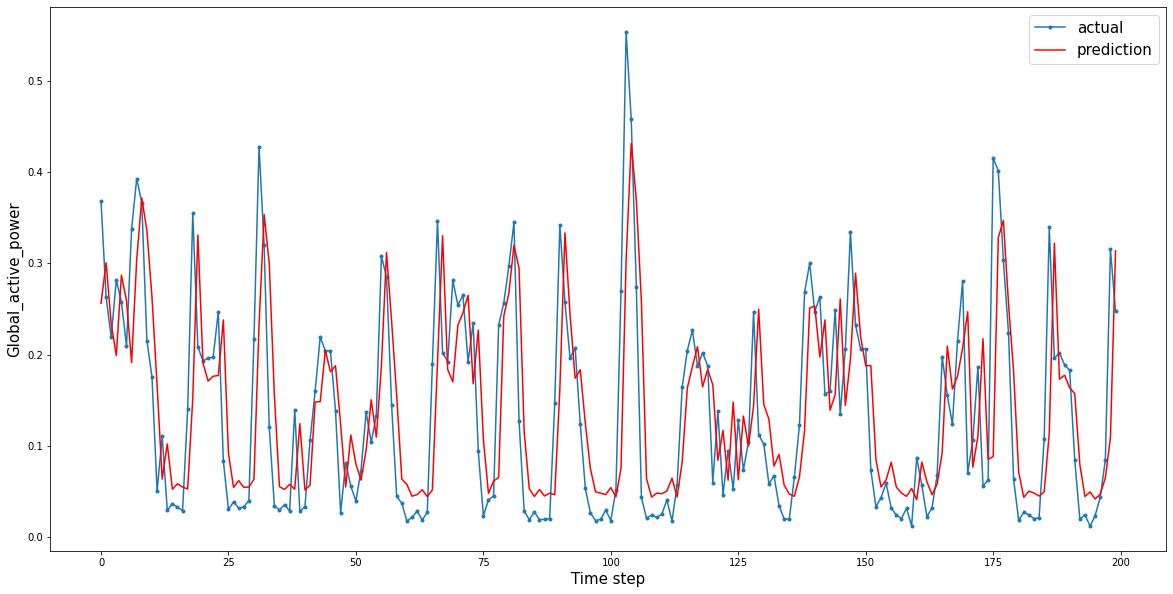

In [13]:
import matplotlib.pyplot as plt

steps = 200

plt.figure(figsize=(20, 10))
plt.plot(range(steps), Y_test[:steps], marker='.', label="actual")
plt.plot(range(steps), model.predict(X_test[:steps]), 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

### **CASO 3** - Input multivariable, output univariable. Lag = 120

X: [X_All{t-120} ... X_All{t-2}, X_All{t-1}] ----> Y: *GlobalAct.Power*{t}

In [14]:
display(hourly)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,12.866667
2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000
2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,0.0,0.066667,0.000000


In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

lag = 120

# Sacamaos  los inputs y outputs.
X = np.zeros((scaled.shape[0] - lag, lag, scaled.shape[1]))
Y = scaled[lag:  , 0]

for i in range(lag):
  X[:, i, :] = scaled[i:- lag + i, :]

print(X.shape, Y.shape)

# Set de entrenamiento y prueba.
n_train = int(len(X) * 0.7)

X_train, X_test = X[:n_train], X[n_train:]
Y_train, Y_test = Y[:n_train], Y[n_train:]

# Alternativamente esto lo podíamos haber realizado con sklearn. 
# OJO! Marcar el shuffle a False.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, shuffle=False)

print(X_train.shape, X_test.shape)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

# El modelo consiste en una capa LSTM sencilla que generará un vector de tamaño
# 100 que luego será analizado por una capa densa para generar el resultado final.

model = Sequential()
model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=32)
model.summary()

(34469, 120, 7) (34469,)
(24128, 120, 7) (10341, 120, 7)
Epoch 1/10
754/754 [==============================] - 6s 8ms/step - loss: 0.0145 - val_loss: 0.0085
Epoch 2/10
754/754 [==============================] - 6s 8ms/step - loss: 0.0096 - val_loss: 0.0070
Epoch 3/10
754/754 [==============================] - 6s 8ms/step - loss: 0.0087 - val_loss: 0.0068
Epoch 4/10
754/754 [==============================] - 6s 8ms/step - loss: 0.0082 - val_loss: 0.0064
Epoch 5/10
754/754 [==============================] - 6s 8ms/step - loss: 0.0080 - val_loss: 0.0063
Epoch 6/10
754/754 [==============================] - 6s 8ms/step - loss: 0.0078 - val_loss: 0.0070
Epoch 7/10
754/754 [==============================] - 6s 8ms/step - loss: 0.0077 - val_loss: 0.0062
Epoch 8/10
754/754 [==============================] - 6s 8ms/step - loss: 0.0076 - val_loss: 0.0066
Epoch 9/10
754/754 [==============================] - 6s 8ms/step - loss: 0.0075 - val_loss: 0.0064
Epoch 10/10
754/754 [======================

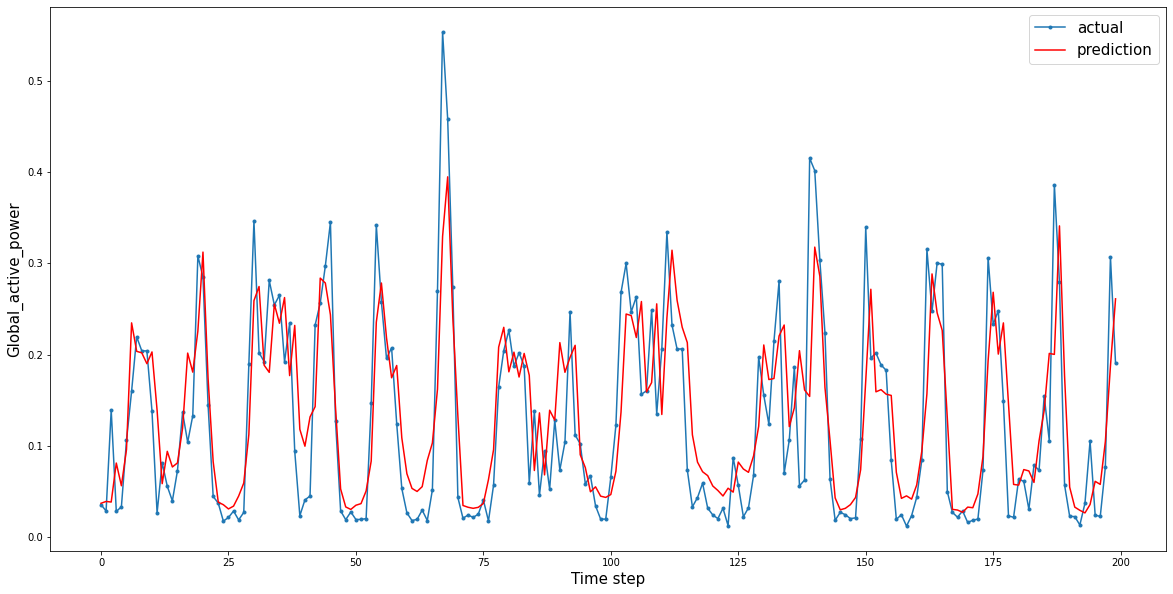

In [19]:
import matplotlib.pyplot as plt

steps = 200

plt.figure(figsize=(20, 10))
plt.plot(range(steps), Y_test[:steps], marker='.', label="actual")
plt.plot(range(steps), model.predict(X_test[:steps]), 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

### **CASO 4** - Input multivariable, output multivariable. Lag = 120

X: [X_All{t-120} ... X_All{t-2}, X_All{t-1}] ----> Y: X_All{t}

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split

lag = 120

# Sacamaos  los inputs y outputs.
X = np.zeros((scaled.shape[0] - lag, lag, scaled.shape[1]))
Y = scaled[lag:  , :]

for i in range(lag):
  X[:, i, :] = scaled[i:- lag + i, :]

print(X.shape, Y.shape)

# Set de entrenamiento y prueba.
n_train = int(len(X) * 0.7)

X_train, X_test = X[:n_train], X[n_train:]
Y_train, Y_test = Y[:n_train], Y[n_train:]

# Alternativamente esto lo podíamos haber realizado con sklearn. 
# OJO! Marcar el shuffle a False.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, shuffle=False)

print(X_train.shape, X_test.shape)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

# El modelo consiste en una capa LSTM sencilla que generará un vector de tamaño
# 100 que luego será analizado por una capa densa para generar el resultado final.

model = Sequential()
model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(7, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=32)
model.summary()

(34469, 120, 7) (34469, 7)
(24128, 120, 7) (10341, 120, 7)
Epoch 1/10
754/754 [==============================] - 6s 8ms/step - loss: 0.0215 - val_loss: 0.0169
Epoch 2/10
754/754 [==============================] - 6s 8ms/step - loss: 0.0154 - val_loss: 0.0145
Epoch 3/10
754/754 [==============================] - 6s 8ms/step - loss: 0.0149 - val_loss: 0.0134
Epoch 4/10
754/754 [==============================] - 6s 8ms/step - loss: 0.0137 - val_loss: 0.0133
Epoch 5/10
754/754 [==============================] - 6s 8ms/step - loss: 0.0132 - val_loss: 0.0131
Epoch 6/10
754/754 [==============================] - 6s 8ms/step - loss: 0.0129 - val_loss: 0.0126
Epoch 7/10
754/754 [==============================] - 6s 8ms/step - loss: 0.0127 - val_loss: 0.0124
Epoch 8/10
754/754 [==============================] - 6s 8ms/step - loss: 0.0124 - val_loss: 0.0122
Epoch 9/10
754/754 [==============================] - 6s 8ms/step - loss: 0.0123 - val_loss: 0.0123
Epoch 10/10
754/754 [====================

[Mejoras a la LSTM]
- LSTM apiladas.
- Dropout.
- Callback de Early Stopping.
- Podemos aumentar épocas.
- Bidireccionalidad.

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

lag = 120

# Sacamaos  los inputs y outputs.
X = np.zeros((scaled.shape[0] - lag, lag, scaled.shape[1]))
Y = scaled[lag:  , :]

for i in range(lag):
  X[:, i, :] = scaled[i:- lag + i, :]

print(X.shape, Y.shape)

# Set de entrenamiento y prueba.
n_train = int(len(X) * 0.7)

X_train, X_test = X[:n_train], X[n_train:]
Y_train, Y_test = Y[:n_train], Y[n_train:]

# Alternativamente esto lo podíamos haber realizado con sklearn. 
# OJO! Marcar el shuffle a False.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, shuffle=False)

print(X_train.shape, X_test.shape)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

# El modelo consiste en una capa LSTM sencilla que generará un vector de tamaño
# 100 que luego será analizado por una capa densa para generar el resultado final.

model = Sequential()
model.add(Bidirectional(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dropout(0.1))
model.add(Dense(7, activation='sigmoid'))

callbacks = [EarlyStopping(patience=5, monitor='val_loss')]

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=32, callbacks=callbacks)
model.summary()

(34469, 120, 7) (34469, 7)
(24128, 120, 7) (10341, 120, 7)
Epoch 1/30
754/754 [==============================] - 23s 30ms/step - loss: 0.0205 - val_loss: 0.0144
Epoch 2/30
754/754 [==============================] - 20s 27ms/step - loss: 0.0145 - val_loss: 0.0132
Epoch 3/30
754/754 [==============================] - 21s 28ms/step - loss: 0.0143 - val_loss: 0.0129
Epoch 4/30
754/754 [==============================] - 20s 27ms/step - loss: 0.0134 - val_loss: 0.0135
Epoch 5/30
754/754 [==============================] - 20s 27ms/step - loss: 0.0133 - val_loss: 0.0129
Epoch 6/30
754/754 [==============================] - 20s 27ms/step - loss: 0.0128 - val_loss: 0.0122
Epoch 7/30
754/754 [==============================] - 20s 27ms/step - loss: 0.0124 - val_loss: 0.0121
Epoch 8/30
754/754 [==============================] - 20s 27ms/step - loss: 0.0121 - val_loss: 0.0120
Epoch 9/30
754/754 [==============================] - 20s 27ms/step - loss: 0.0118 - val_loss: 0.0114
Epoch 10/30
754/754 [==

In [74]:
X_new = X_test[-1]

print(X_new.shape)

forecast_steps = 100

for i in range(forecast_steps):
  X_new = np.append(X_new, model.predict(X_new[np.newaxis, - lag:]), axis=0)

X_new.shape

(120, 7)


(220, 7)

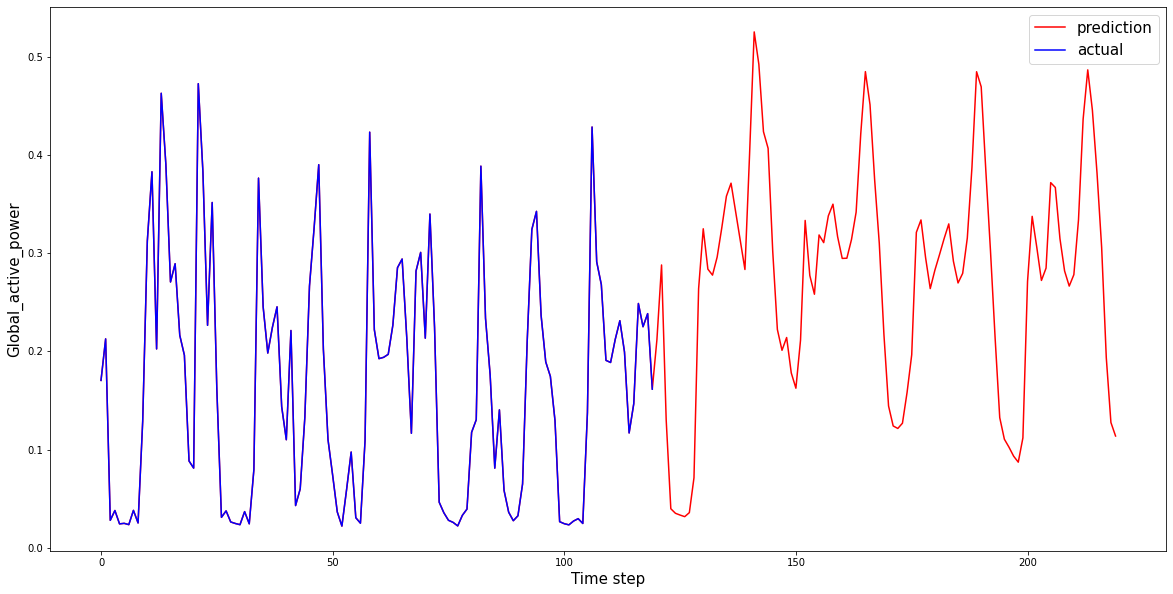

In [77]:
import matplotlib.pyplot as plt

steps = 200

plt.figure(figsize=(20, 10))
# plt.plot(range(steps), Y_test[:steps, 0], marker='.', label="actual")
plt.plot(range(len(X_new)), X_new[:, 0],    'r', label="prediction")
plt.plot(range(lag),        X_new[:lag, 0], 'b', label="actual")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()